In [4]:
!pip install matplotlib

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 26 17:52:47 2024

@author: nanor
"""

'\nCreated on Sun May 26 17:52:47 2024\n\n@author: nanor\n'

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [7]:
# Cargar los datos preprocesados y las etiquetas
tfidf_df = pd.read_csv('tfidf_features.csv')
labels_df = pd.read_csv('labels.csv')

# Verificar que el número de muestras y etiquetas coincida
assert len(tfidf_df) == len(labels_df), "El número de muestras y etiquetas no coincide"

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, labels_df, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train.values.ravel())

# Realizar predicciones
y_pred = model.predict(X_test)

In [8]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5142857142857142
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.47      0.51        95
           1       0.47      0.56      0.51        80

    accuracy                           0.51       175
   macro avg       0.52      0.52      0.51       175
weighted avg       0.52      0.51      0.51       175

Confusion Matrix:
[[45 50]
 [35 45]]


Época 1, Precisión: 0.5142857142857142
Época 2, Precisión: 0.5085714285714286
Época 3, Precisión: 0.5257142857142857
Época 4, Precisión: 0.5257142857142857
Época 5, Precisión: 0.5314285714285715
Época 6, Precisión: 0.5314285714285715
Época 7, Precisión: 0.52
Época 8, Precisión: 0.52
Época 9, Precisión: 0.52
Época 10, Precisión: 0.52


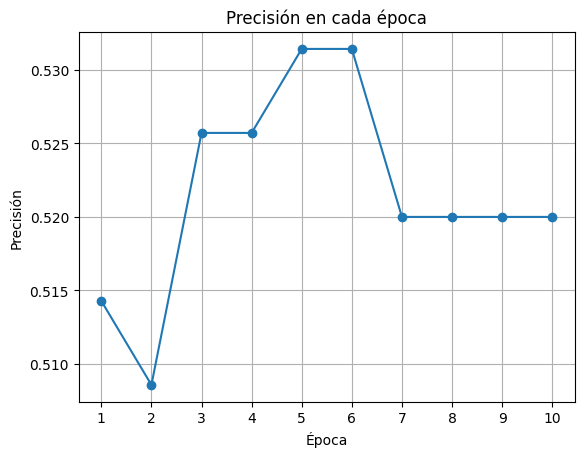

In [10]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Crear y entrenar el modelo Naive Bayes
model = MultinomialNB()
epocas=10

# Lista para guardar la precisión en cada época
accuracy_list = []

# Entrenar el modelo durante 5 épocas
for epoch in range(epocas):
    model.partial_fit(X_train, y_train.values.ravel(), classes=np.unique(y_train))
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    print(f"Época {epoch + 1}, Precisión: {accuracy}")

# Graficar la precisión en cada época
plt.plot(range(1, epocas+1), accuracy_list, marker='o')
plt.title('Precisión en cada época')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.xticks(range(1, epocas+1))
plt.grid(True)
plt.show()


En la gráfica observamos que entre la época 5 y 6 se alcanza el rendimiento óptimo. A partir de este punto, continuar el entrenamiento solo representa un gasto de cómputo innecesario, ya que la precisión se estabiliza en un 52%. Por lo tanto, podemos concluir que la época 5 es la óptima para este modelo.